This aim of this Problem Statement is to introduce Deep Learning, which is one of the most used techniques for Computer Vision Application. 
Before beginning go thorugh the following articles:
1. https://www.nature.com/articles/nature14539 : It is fairly easy to follow and provides an excellent overview of the field. (You will need to login with smail to download the pdf.) 

2. http://deeplearning.stanford.edu/tutorial/supervised/MultiLayerNeuralNetworks/ : A short introduction to Multi-layer perceptrons.

3. https://cs231n.github.io/convolutional-networks/ : Introduction to Convolutional Neural Networks. CNNs are generally used for computer vision problems.


This introduction should be sufficient to get you started with this problem statement. If after going through the PS, you guys are interested in further exploring the field, I would suggest the following resources:
1. http://cs231n.stanford.edu/ : Online course by Stanford.
2. http://introtodeeplearning.com/: Video Lectures from MIT
3. https://www.deeplearningbook.org/: Most popular book on Deep Learning




The aim of this get you all familiarized with Deep Learning in PyTorch, a very popular Deep Learning Library (or in general GPU computation library).

Some of the preprocessing work has been done, and you guys are expected to fill-in code where you are asked to. 

In this notebook we will be doing the following tasks:
1.   Define a small convolutional neural network and train in on MNIST digit dataset (as a classification task).
2.   Take the trained network, freeze all of its weights and learn the image which gives the output of a particular digit. (This will be defined better, when we reach that task).
3.   (Bonus) Try the same on a different dataset (like MNIST fashion dataset).
4.   (Bonus) Try to formulate the MNIST classification problem as a regression problem instead. (i.e. Have 1 output unit which outputs a floating point value and you round it off to obtain the digit.)


Before diving into the code ensure that you copy the notebook to your drive (See the option in File Tab) and that the Runtime Type is set to GPU (Runtime tab -> Change runtime type). To see the importance of GPU in deep learning see [this](https://course.fast.ai/gpu_tutorial.html) short article.











The following cell imports all the necessary packages. We will be using :
1. Several Modules of PyTorch. This will be used to do all the processing and importing the dataset etc. Read [this](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) and [this](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html) article to get started. Here are the [official docs](https://pytorch.org/docs/stable/index.html).

2. NumPy is likely the most popular Matrix manipulation and linear algebra library available for Python. Unfortunately it does not support processing on GPU and therefore we will not be using it much here (Only as a support library for matplotlib). Here is a quick [tutorial](https://cs231n.github.io/python-numpy-tutorial/) if you are interested. 

3. Matplotlib is the most popular library for generating plots in Python. We will be using it for printing images. 

In [0]:

import torch 
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.autograd import Variable


import numpy as np

from matplotlib import pyplot as plt

#This to ensure that the default device for processing PyTorch tensors is GPU instead of a CPU.
device = 'cuda' #Change this to 'cpu' to run on cpu. 

Here we will download the MNIST digit dataset and convert it into PyTorch dataset object. 

torchvision module of PyTorch provides several Computer Vision specific functionalities one of which is easy importing of several [popular datasets](https://pytorch.org/docs/stable/torchvision/datasets.html). 

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


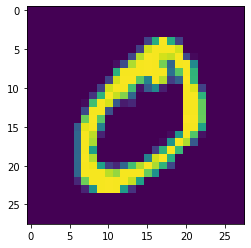

In [0]:
#We will load the MNIST dataset here.

#This creates a transform object which will be passed to the later functions. It converts the training image from PIL Image objects to PyTorch image objects.
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_data = torchvision.datasets.MNIST(root = './data', train = True, download = True, transform = transform )

test_data = torchvision.datasets.MNIST(root = './data',train = False ,download = True,  transform = transform)

 

print(train_data)
print(test_data)

plt.imshow(np.asarray(train_data[1][0].reshape(28,28)))



The following cell converts the DataSet objects to DataLoader objects. 
DataLoader objects in PyTorch provide several useful functionalities, such as automatic batching, parallel data processing on the CPU, etc. Therefore it is generally advisable to use dataloader instead of manually handling data. 

Read more about PyTorch DataSet and DataLoader [here](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)

In [0]:
#BATCHs are only used for training, while testing we conventionally use a batch size of 1.  
BATCH_SIZE = 32 
train_loader = torch.utils.data.DataLoader (train_data, batch_size = BATCH_SIZE, )
test_loader = torch.utils.data.DataLoader (test_data, batch_size = 1, )




print(train_loader)

**TASK 1**

We will define our network in the following cell. There are several ways of doing this in PyTorch, but in this example we will do it by subclassing nn.module. You should be able to do this after reading the tutorials given at the top of the page. [This](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) is extra reading to help you out. (Do remember that we are dealing with 1 channel B/W images not 3 channels colour images.)

[Here](https://pytorch.org/docs/stable/nn.html) are official docs of nn module to help you out. 

Our network will have 4 convolutional layers followed by 2 fully-connected layers. (You free to change make slight changes to this but don't make the network too deep in the final submission). 

Don't forget to have ReLU activations and maxpooling layers.

Experiment with different kernal sizes, width and sizes of hidden fully connected units. 


In [0]:
## Complete the functions __init__ and forward below

class MyConvNet(nn.Module):
  def __init__(self):
    """ 
      Initialize all the weights for each layer you require.

    """    
    super(MyConvNet, self).__init__()
    # Put your code here: 
    # __begin
    
  
    #__end
  def forward (self, x):
    """
    Define a forward pass for the given network. x is a 4 dimentional input tensor. 
    Input: x.size() = [BATCH_SIZE, 1, 28, 28]

    Return a 2-dimentional, 10-unit output tensor representing the probability of each class. Use a softmax output unit.
    Output: x.size() = [BATCH_SIZE, 10] 
    """
    # Put your code here: 
    # __begin
   
    
    #__end
    #Return statement uses softmax, so after the final fully connected layer store the value in x (without using ReLU or any other activation).
    return F.softmax(x, dim = 1) 


The following cell will instantiate the the network we defined above.
Check the size of the output tensor (it should be [BATCH_SIZE, 10]) and see if the values in the output tensor printed below are numbers between 0 and 1. (Infact most values should be close to 0.1. Why?)

In [0]:
#Setting few things up.

net = MyConvNet()
net.to(device)
print(net)
tld = iter(train_loader)
im = next(tld)[0].to(device)
print ('Size of the output tensor:' ,net.forward(im).size())
print (net.forward(im))


The following cell will define the training and the testing loop. 


I have already defined the training loop to give you guys some idea. Try changing the learning rates, EPOCHS, weight_decay, and optimizers etc. to see how the learning process changes.


Your task is to define the test function which prints the test accuracy, given the model and test_loader. Do remember that while testing we use a single image (batch of size 1). 

First understand the train function properly. Then attempt to write the test function.

(HINT: you don't need optimizer (torch.optim) and loss fucntion (nn.CrossEntropyLoss) for testing).




In [0]:
def train(model, train_loader, EPOCHS = 6, lossF = None):
  
  if lossF == None:
    lossF = nn.CrossEntropyLoss() #Cross entropy loss is popularly used for classification tasks. 
  
  ## Adam is a very popular choice of optimization algorithms. 
  ## It is not very sensitive to hyperparameters and therefore it becomes a natural choice in quick experiments.
  optim = torch.optim.Adam (model.parameters(), lr = 4e-4, weight_decay=1e-3) 
  
  model.train() #Changes the model to train mode. All the require_grad are set to true.
  
  for epoch in range(EPOCHS):
    correct = 0
    for batch_idx, (X_batch, y_batch) in enumerate(train_loader):
      
      #Move data to device
      var_X_batch = Variable(X_batch).to(device) 
      var_y_batch = Variable(y_batch).to(device)
      # print(var_X_batch.size())
      
      ## Forward Pass!
      output = model(var_X_batch)

      # print(output)
      # print(output.size(), var_y_batch.size())
      
      ## Calculate the loss incurred
      loss = lossF (output, var_y_batch)
      
      ## BackProp: Computes all gradients.
      loss.backward()
      
      ## Gradient Descent Step (Adam)
      optim.step()
      optim.zero_grad() # This is important because PyTorch keeps on adding to the original value of gradient.

      ## Gets the predictions. From probablities (the digit with highest probablity is the prediction) 
      predicted = torch.max(output.data, axis = 1).indices
      
      # print(predicted)

      ## Calculates the number of correct predictions in a batch
      correct += (predicted == var_y_batch).sum()

      if (batch_idx % 200) == 0:
          print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
                    epoch, batch_idx*len(X_batch), len(train_loader.dataset), 100.*batch_idx / len(train_loader), loss.item(), float(correct*100) / float(BATCH_SIZE*(batch_idx+1))))



def test(model, test_loader):
    """
    Change the value of correct to contain the number of correctly classified test examples out of the 10000 example in test_loader.
    """
    correct = 0 
    # Put your code here: 
    # __begin
    
  
    #__end
    print("Test accuracy:{:.3f}% ".format( float(correct * 100) / (len(test_loader))))



Running the following cell will start training of the "net". 

Note: Any decent bugfree conv-net should easily reach an accuracy of atleast 96%. If you are unable to do so, try improving the network architecture and/or try different training rate or longer training (higher EPOCHS)  

In [0]:
train (net, train_loader, EPOCHS = 10)

Run the test function that you defined above! 


Note: You should easily reach 95%.


In [0]:
test(net, test_loader)

Test accuracy:98.600% 


(Bonus) **TASK 2**

Before getting started read [this article](https://ai.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html) on Deep Dream.

Description of the task: Now we have trained the network to classify all the digits from 0 to 10. But is there a way to visualize what the network has learnt? 

Well how about we learn (by backprop + Gradient Descent) the input image after fixing the expected output and all the network parameters. In other words say we want to visualize what 7 looks like to the network. Then we will do the following:
1. Initialize image tensor as im (maybe with all zeros).
2. Pass the image through the network.
3. Compute the loss with output of the net and expected output of 7.
4. Run backpropogation upto the image tensor.
5. Update the image using the update rule. (Specified by torch.optim object)


Remember that while creating the optimization object (torch.optim object) you have to pass to it a list of parameters to be optimized. Which in this case won't be model.parameters() but rather [im, ].

Note: We are not using training or test data anywhere here!






In [0]:
def train_im(model, digit = 7 ,iters = 1000, lossF = None):
  """
  Train the input image to match the <digit>. Run <iters> iterations of Gradient Descent.  
  """
  im = torch.zeros_like(train_data[1][0]).view(1, 1, 28, 28).to(device)
  im = Variable(im, requires_grad = True)
  digit = Variable(torch.tensor(digit)).to(device).view(1)
  # Put your code here: 
  # __begin


  #__end
    
  return im

In [0]:
## Let's run our function for 7 and see what image we get.

im = train_im (net, train_loader, digit=7)
im = np.asarray(im.view(28, 28).cpu().detach())
plt.imshow(im)

In the the following cell we will run the function for all the digits from 0 to 9 and print the outputs! 

Enjoy you are done!


In [0]:
for i in range (10):
  im = train_im (net, train_loader, digit=i, iters=1000)
  im = np.asarray(im.view(28, 28).cpu().detach())
  print (i)
  plt.imshow(im)
  plt.show()